In [60]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pandas as pd
import pickle as pkl
from utils import constants as cnst


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [59]:
cd ..

/home/ck/pythonWorkspace


In [4]:
inpath = cnst.network_data + '/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/tracked/'
path = inpath + 'track_back_cores_vn2_17Z.txt'
dic = pd.read_table(path, delim_whitespace=True, header=None, names=['year' ,'mon' ,'day', 'i_core' ,'j_core' ,'i_initiation' ,'j_initiation', 'core_time', 'initiation_time'])

In [6]:
dic

,year,mon,day,i_core,j_core,i_initiation,j_initiation,core_time,initiation_time
0,2006,6,1,379,231,362,219,17.0,13.5
1,2006,6,1,336,233,362,219,17.0,13.5
2,2006,6,1,333,236,362,219,17.0,13.5
3,2006,6,1,365,236,362,219,17.0,13.5
4,2006,6,1,398,388,385,399,17.0,13.0
...,...,...,...,...,...,...,...,...,...
9527,2010,9,28,405,357,-99,-99,17.0,2.0
9528,2010,9,28,396,369,-99,-99,17.0,2.0
9529,2010,9,28,396,372,-99,-99,17.0,2.0
9530,2010,9,28,404,372,-99,-99,17.0,2.0


In [63]:
def merge_tab(h):
    outpath = cnst.network_data + '/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/init_merged2/'
    inpath1 = cnst.network_data + '/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/totrack2/'
    inpath2 = cnst.network_data + '/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/tracked/'
    msgopen = pd.read_csv(inpath1 + 'cores_gt15000km2_table_AMSRE_LSTA_tracking_SMbox90_2hOverlap_'+str(h)+'.csv', na_values=-99)
    path = inpath2 + 'track_back_cores_vn2_'+str(h).zfill(2)+'Z.txt'
    dic = pd.read_table(path, delim_whitespace=True, header=None, names=['year' ,'mon' ,'day', 'i_core' ,'j_core' ,'i_initiation' ,'j_initiation', 'core_time', 'initiation_time'], na_values=-99)
    msgopen['initTime'] = np.nan
    msgopen['xinit'] = np.nan
    msgopen['yinit'] = np.nan
    msgopen['xdiff']= np.nan
    for dids, dit in msgopen.iterrows():
        ddic = dic[(dic['i_core']==dit['xloc']) & (dic['j_core']==dit['yloc']) & (dic['year']==dit['year']) & (dic['mon']==dit['month'])  & (dic['day']== dit['day'])]
        msgopen['initTime'] = dic['initiation_time']
        msgopen['xinit'] = dic['i_initiation']
        msgopen['yinit'] = dic['j_initiation']
        msgopen['xdiff'] = dic['i_initiation']-dic['i_core']
    (msgopen['initTime'])[np.isnan(msgopen['xinit'])] = 2
    #ipdb.set_trace()
    msgopen.to_csv(outpath + "cores_gt15000km2_table_AMSRE_tracking2_" + str(h) + "_init.csv", na_rep=-999, index_label='id')

In [65]:
for h in list(np.arange(15,24)):  #list(np.arange(15,24))+
    merge_tab(h)

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [86]:
path = cnst.network_data + '/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/init_merged/'
msgopen = pd.read_csv(path + "cores_gt15000km2_table_AMSRE_tracking_17_init.csv", na_values=-999)

In [87]:
path = cnst.network_data + '/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/init_merged2/'
msgopen2 = pd.read_csv(path + "cores_gt15000km2_table_AMSRE_tracking2_17_init.csv", na_values=-999)

In [88]:
msgopen['SMmean-1']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
9527    2.427006
9528    2.164724
9529    2.127024
9530    1.997845
9531    1.761133
Name: SMmean-1, Length: 9532, dtype: float64

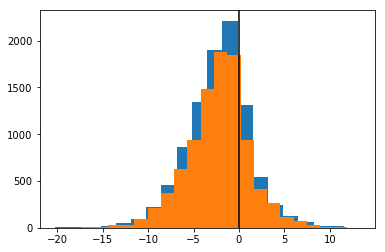

In [90]:
plt.hist(msgopen['SMmean0'][np.isfinite(msgopen['SMmean0'])], bins=20)
plt.hist(msgopen2['SMmean0'][np.isfinite(msgopen2['SMmean0'])], bins=20)
plt.axvline(0, color='k')

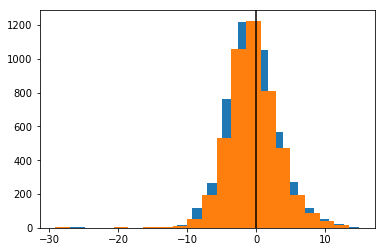

In [91]:
plt.hist(msgopen['SMmean-1'][np.isfinite(msgopen['SMmean-1'])], bins=20)
plt.hist(msgopen2['SMmean-1'][np.isfinite(msgopen2['SMmean-1'])], bins=20)
plt.axvline(0, color='k')

In [155]:
np.percentile(msgopen['SMmean-1'],[25,75])

array([-1.84988145,  0.96899393])

In [156]:
msgopen['SMmean-1'].size

2971

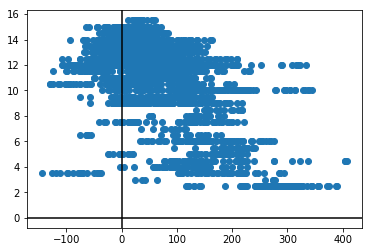

In [92]:
plt.scatter(msgopen['xdiff'], msgopen['initTime'])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

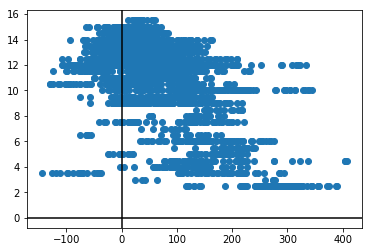

In [93]:
plt.scatter(msgopen2['xdiff'], msgopen2['initTime'])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [41]:
msgopen[(msgopen['xdiff']>=100) | (msgopen['initTime'] <= 2.5)]

,id,id.1,year,month,day,hour,lon,lat,xloc,yloc,...,SMdry-1,SMwet-1,LSTAmean,LSTAslotfrac,dtime,ERAqmean,initTime,xinit,yinit,xdiff
24,24,105,2006,6,5,17,-3.666952,10.278089,474,231,...,0.0,0.0,2.731977,1.000000,1.0,15.08,5.0,692.0,402.0,218.0
25,25,106,2006,6,5,17,-3.891531,10.411511,466,236,...,0.0,0.0,2.696197,1.000000,1.0,15.08,5.0,692.0,402.0,226.0
26,26,107,2006,6,5,17,-3.442373,10.589316,482,243,...,0.0,0.0,3.325430,1.000000,1.0,15.09,5.0,692.0,402.0,210.0
27,27,108,2006,6,5,17,-3.622036,10.767017,476,249,...,0.0,0.0,3.353060,1.000000,0.0,15.06,5.0,692.0,402.0,216.0
28,28,109,2006,6,5,17,-2.813552,10.855828,505,252,...,0.0,0.0,4.482429,1.000000,1.0,15.12,5.0,692.0,402.0,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,9527,19432,2010,9,28,17,-5.643245,13.814258,405,357,...,0.0,1.0,-0.849622,0.141558,0.0,15.70,2.0,NaN,NaN,NaN
9528,9528,19433,2010,9,28,17,-5.912740,14.165138,396,369,...,0.0,1.0,-1.450397,0.120779,0.0,15.33,2.0,NaN,NaN,NaN
9529,9529,19434,2010,9,28,17,-5.912740,14.252773,396,372,...,0.0,1.0,-1.823011,0.123377,0.0,15.22,2.0,NaN,NaN,NaN
9530,9530,19435,2010,9,28,17,-5.688161,14.252773,404,372,...,0.0,1.0,-1.947288,0.128571,0.0,15.26,2.0,NaN,NaN,NaN


In [47]:
msgopen[(msgopen['xdiff']<100)]

,id,id.1,year,month,day,hour,lon,lat,xloc,yloc,...,SMdry-1,SMwet-1,LSTAmean,LSTAslotfrac,dtime,ERAqmean,initTime,xinit,yinit,xdiff
0,0,0,2006,6,1,17,-6.272066,10.278089,379,231,...,0.0,0.0,-2.486118,0.035065,1.0,15.04,13.5,362.0,219.0,-17.0
1,1,2,2006,6,1,17,-7.484792,10.322570,336,233,...,0.0,0.0,-0.424518,0.062574,0.0,14.91,13.5,362.0,219.0,26.0
2,2,4,2006,6,1,17,-7.574623,10.411511,333,236,...,0.0,0.0,-0.621312,0.064935,0.0,14.92,13.5,362.0,219.0,29.0
3,3,5,2006,6,1,17,-6.676308,10.411511,365,236,...,0.0,0.0,-1.909900,0.055659,1.0,15.00,13.5,362.0,219.0,-3.0
4,4,22,2006,6,1,17,-5.867824,14.690426,398,388,...,0.0,0.0,7.146761,0.875974,2.0,11.11,13.0,385.0,399.0,-13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,9518,19415,2010,9,27,17,-8.068697,15.780633,322,425,...,1.0,0.0,6.298510,0.998701,1.0,12.55,15.0,337.0,431.0,15.0
9519,9519,19416,2010,9,27,17,-7.484792,16.258476,343,442,...,0.0,0.0,5.711782,0.995455,0.0,11.00,15.0,337.0,431.0,-6.0
9520,9520,19417,2010,9,27,17,-7.350044,16.431947,348,448,...,0.0,0.0,5.409287,0.992208,0.0,10.56,15.0,337.0,431.0,-11.0
9521,9521,19419,2010,9,27,17,-9.820411,16.648566,263,454,...,0.0,1.0,5.798747,0.999315,1.0,11.31,14.5,253.0,463.0,-10.0


In [48]:
len(msgopen)

9532

In [56]:
3315/9532

0.347775912715065

In [57]:
msgopen[ (msgopen['topo']<=450)  & (msgopen['dtime']<=2)]

,id,id.1,year,month,day,hour,lon,lat,xloc,yloc,...,SMdry-1,SMwet-1,LSTAmean,LSTAslotfrac,dtime,ERAqmean,initTime,xinit,yinit,xdiff
0,0,0,2006,6,1,17,-6.272066,10.278089,379,231,...,0.0,0.0,-2.486118,0.035065,1.0,15.04,13.5,362.0,219.0,-17.0
1,1,2,2006,6,1,17,-7.484792,10.322570,336,233,...,0.0,0.0,-0.424518,0.062574,0.0,14.91,13.5,362.0,219.0,26.0
2,2,4,2006,6,1,17,-7.574623,10.411511,333,236,...,0.0,0.0,-0.621312,0.064935,0.0,14.92,13.5,362.0,219.0,29.0
3,3,5,2006,6,1,17,-6.676308,10.411511,365,236,...,0.0,0.0,-1.909900,0.055659,1.0,15.00,13.5,362.0,219.0,-3.0
4,4,22,2006,6,1,17,-5.867824,14.690426,398,388,...,0.0,0.0,7.146761,0.875974,2.0,11.11,13.0,385.0,399.0,-13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,9527,19432,2010,9,28,17,-5.643245,13.814258,405,357,...,0.0,1.0,-0.849622,0.141558,0.0,15.70,2.0,NaN,NaN,NaN
9528,9528,19433,2010,9,28,17,-5.912740,14.165138,396,369,...,0.0,1.0,-1.450397,0.120779,0.0,15.33,2.0,NaN,NaN,NaN
9529,9529,19434,2010,9,28,17,-5.912740,14.252773,396,372,...,0.0,1.0,-1.823011,0.123377,0.0,15.22,2.0,NaN,NaN,NaN
9530,9530,19435,2010,9,28,17,-5.688161,14.252773,404,372,...,0.0,1.0,-1.947288,0.128571,0.0,15.26,2.0,NaN,NaN,NaN


In [58]:
msgopen[((msgopen['xdiff']>=100) | (msgopen['initTime'] <= 2.5)) &  (msgopen['topo']<=450) & (msgopen['dtime']<=2)]

,id,id.1,year,month,day,hour,lon,lat,xloc,yloc,...,SMdry-1,SMwet-1,LSTAmean,LSTAslotfrac,dtime,ERAqmean,initTime,xinit,yinit,xdiff
24,24,105,2006,6,5,17,-3.666952,10.278089,474,231,...,0.0,0.0,2.731977,1.000000,1.0,15.08,5.0,692.0,402.0,218.0
25,25,106,2006,6,5,17,-3.891531,10.411511,466,236,...,0.0,0.0,2.696197,1.000000,1.0,15.08,5.0,692.0,402.0,226.0
26,26,107,2006,6,5,17,-3.442373,10.589316,482,243,...,0.0,0.0,3.325430,1.000000,1.0,15.09,5.0,692.0,402.0,210.0
27,27,108,2006,6,5,17,-3.622036,10.767017,476,249,...,0.0,0.0,3.353060,1.000000,0.0,15.06,5.0,692.0,402.0,216.0
28,28,109,2006,6,5,17,-2.813552,10.855828,505,252,...,0.0,0.0,4.482429,1.000000,1.0,15.12,5.0,692.0,402.0,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,9527,19432,2010,9,28,17,-5.643245,13.814258,405,357,...,0.0,1.0,-0.849622,0.141558,0.0,15.70,2.0,NaN,NaN,NaN
9528,9528,19433,2010,9,28,17,-5.912740,14.165138,396,369,...,0.0,1.0,-1.450397,0.120779,0.0,15.33,2.0,NaN,NaN,NaN
9529,9529,19434,2010,9,28,17,-5.912740,14.252773,396,372,...,0.0,1.0,-1.823011,0.123377,0.0,15.22,2.0,NaN,NaN,NaN
9530,9530,19435,2010,9,28,17,-5.688161,14.252773,404,372,...,0.0,1.0,-1.947288,0.128571,0.0,15.26,2.0,NaN,NaN,NaN


In [101]:
(msgopen['SMmean0'])[(msgopen['SMmean0']>0)&(msgopen['SMmean-1']>0.4)].shape

(290,)

In [104]:
test = msgopen[(msgopen['SMmean0']>0.2)&(msgopen['SMmean-1']>0.4)]

In [105]:
test

,id,year,month,day,hour,lon,lat,xloc,yloc,area,csize,t,storm_id,SMmean0,SMdry0,SMwet0,SMmean-1,SMdry-1,SMwet-1
207,207,2006,6,24,17,-0.792343,9.654712,578,209,21000,15.0,-72.654995,2,1.277610,0.0,1.0,5.554705,0.0,1.0
215,215,2006,6,26,17,-10.763642,14.077469,225,365,87950,15.0,-82.501805,5,0.882230,0.0,1.0,3.501921,0.0,1.0
234,234,2006,6,29,17,-8.787349,12.890681,293,324,25200,25.0,-79.845151,6,0.478781,0.0,0.0,2.254702,0.0,1.0
235,235,2006,6,29,17,-9.011928,13.154923,285,333,25200,15.0,-86.938956,6,0.371817,0.0,0.0,1.066733,0.0,0.0
236,236,2006,6,29,17,-9.191591,13.286937,279,338,25200,16.0,-80.545582,6,0.288493,0.0,0.0,0.561276,0.0,0.0
238,238,2006,6,29,17,-8.967012,13.989766,288,362,25200,15.0,-72.542053,6,0.438549,0.0,0.0,0.476335,0.0,0.0
241,241,2006,6,30,17,7.741652,10.944612,887,255,31325,15.0,-75.000000,3,3.806061,0.0,1.0,12.154957,0.0,1.0
242,242,2006,6,30,17,7.966231,11.033369,895,258,31325,15.0,-82.044507,3,4.705406,0.0,1.0,11.284389,0.0,1.0
243,243,2006,6,30,17,7.382326,11.343804,873,269,31325,22.0,-80.349328,3,5.372729,0.0,1.0,14.468843,0.0,1.0
244,244,2006,6,30,17,8.011147,11.343804,896,269,31325,16.0,-74.059582,3,5.498231,0.0,1.0,12.229445,0.0,1.0


In [123]:
np.percentile((msgopen['SMmean0'])[(msgopen['SMmean0']<0)&(msgopen['SMmean-1']<-2)], [45])

array([-3.19471506])

In [130]:
(msgopen['SMmean0'][(msgopen['SMmean0']<0)&(msgopen['SMmean-1']<-1)].shape)[0]*0.28

244.44000000000003

In [131]:
np.percentile((msgopen['SMmean0']), [27])

array([-2.78110359])

In [39]:
np.sum(msgopen['SMmean-1']>0.1)/msgopen['SMmean-1'].size

0.37868852459016394

In [47]:
print(np.sum(msgopen['SMmean0']>0.1)/msgopen['SMmean0'].size)
print(np.percentile(msgopen['SMmean0'],[80,10]))


0.2122950819672131
[ 0.18244455 -4.67286792]


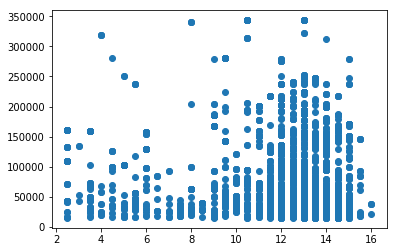

In [34]:
scat = msgopen[(msgopen['initTime'] >= 2) & (msgopen['initTime'] <=17)]
plt.scatter(scat['initTime'], scat['area'])

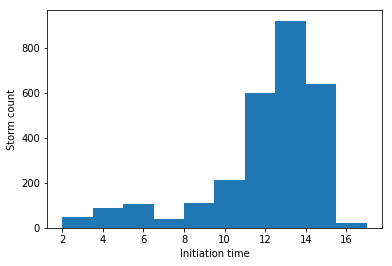

In [35]:
f = plt.figure()
plt.hist(msgopen['initTime'], range=(2,17))
plt.ylabel('Storm count')
plt.xlabel('Initiation time')
f.savefig('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/propagating/storm_number_new.jpg')

(0, 600)

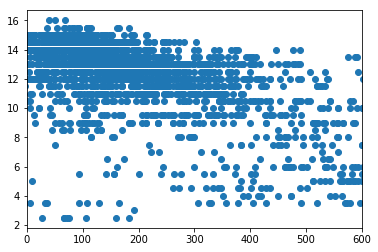

In [44]:
plt.scatter(msgopen['xdiff']*3,msgopen['initTime'])
plt.xlim(0,600)

In [13]:
np.unique(msgopen['initTime'])

array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,
        7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5,
       13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 99.9])

In [41]:
msgopen['velocity'] = msgopen['deltaDist']/msgopen['deltaH']

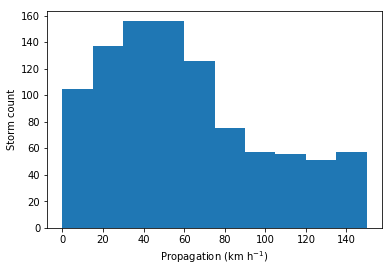

In [42]:
f = plt.figure()
plt.hist(msgopen['velocity'][msgopen['velocity']>0], range=(0,150))
plt.xlabel('Propagation (km h$^{-1}$)')
plt.ylabel('Storm count')
# max around 30-50km per hour. 
f.savefig('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/propagating/storm_propagation.jpg')

In [48]:
np.median((msgopen['area'])[(msgopen['initTime']>=13) & (msgopen['initTime']<17)])

51200.0

In [49]:
np.median((msgopen['area'])[(msgopen['initTime']<=3) & (msgopen['initTime']>0)])

61562.5

(array([370., 223., 117.,  94.,  78.,  78.,  42.,  24.,  46.,  53.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <a list of 10 Patch objects>)

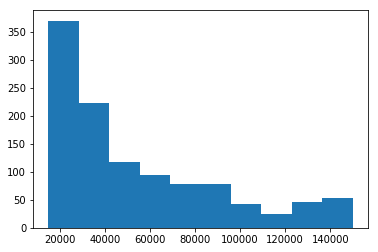

In [55]:
plt.hist((msgopen['area'])[(msgopen['initTime']>=13) & (msgopen['initTime']<17)], range=(15000,150000), bins=10)

(array([545., 328., 316., 213., 131., 136., 131.,  88., 100.,  73.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <a list of 10 Patch objects>)

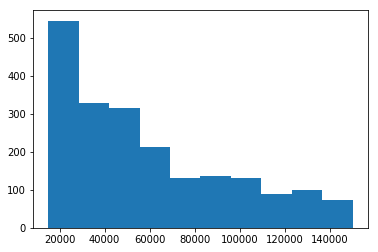

In [56]:
plt.hist((msgopen['area'])[(msgopen['initTime']<=3) & (msgopen['initTime']>0)], range=(15000,150000), bins=10)

In [92]:
initmsg = msgopen[msgopen['initTime']>=13].copy()

In [114]:
for key in ['storm_id', 'year', 'month', 'day']:
    initmsg[key] = initmsg[key].astype(np.str)

In [117]:
np.unique(initmsg['storm_id'] + initmsg['year'] + initmsg['month'] + initmsg['day']).shape

(455,)

In [118]:
propagationmsg = msgopen[msgopen['initTime']<=6].copy()

In [119]:
for key in ['storm_id', 'year', 'month', 'day']:
    propagationmsg[key] = propagationmsg[key].astype(np.str)

In [120]:
np.unique(propagationmsg['storm_id'] + propagationmsg['year'] + propagationmsg['month'] + propagationmsg['day']).shape

(745,)